In [1]:
import pandas as pd
ames_housing = pd.read_csv("../datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [2]:
ames_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), SimpleImputer(), LinearRegression())
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-789.288382,493.149659,6157.777559,-7.097634e+17,-2.427431e+17,-6.781561e+17,-1.490841e+18,7.704293e+03,1.124683e+04,-1.912343e+03,...,2126.251705,11628.961004,-3278.454592,3285.653481,1255.240989,-3391.824436,31.406083,708.080674,-2739.575338,-1049.229387
max,3118.334085,2600.580022,7841.778092,1.555656e+18,5.384573e+17,1.488825e+18,6.821604e+17,3.037757e+18,3.430206e+18,3.910684e+17,...,3742.495077,22652.887617,4594.573279,5790.840525,3026.579436,-1880.226354,1697.203405,2002.443930,71.752187,609.116535


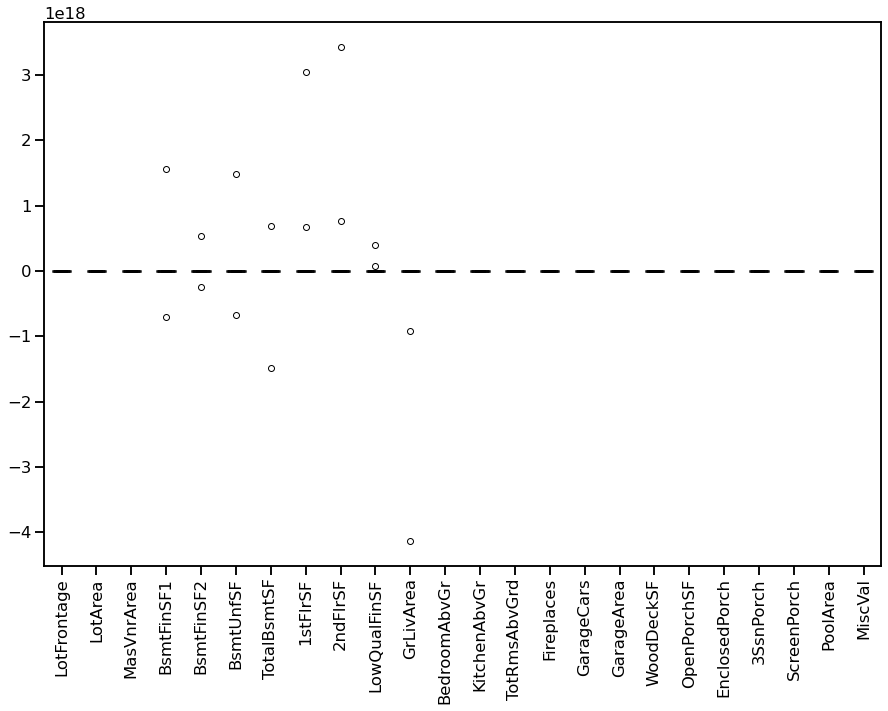

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

In [6]:
from sklearn.linear_model import Ridge

model = make_pipeline(StandardScaler(), SimpleImputer(), Ridge())
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)

coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-1106.390251,493.241149,6160.174281,7862.675825,-658.138989,2228.279835,10672.328896,7710.158127,11239.294498,-2770.486291,...,2145.289789,11610.608799,-3181.355643,3289.713416,1494.094884,-3392.058947,32.71609,741.077136,-2417.383218,-1050.605437
max,3114.054017,2600.372186,7844.293345,11098.537210,358.864078,4174.361863,15692.315254,11243.761722,13643.834636,-1279.923974,...,3758.108015,22561.856453,4623.099297,5792.154742,3030.373856,-2103.032226,1697.55411,2172.625290,70.601154,608.205089


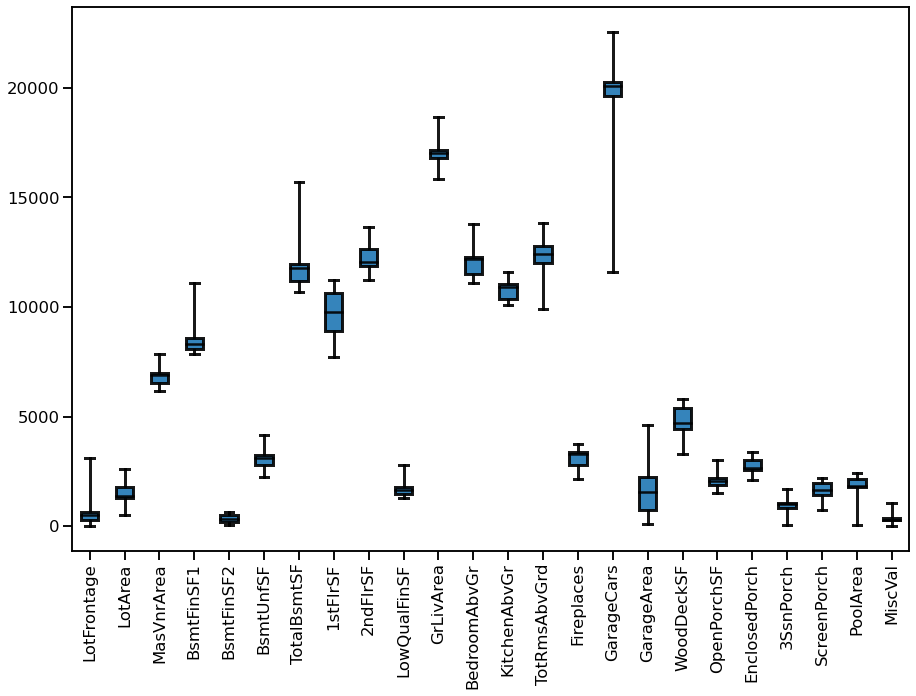

In [7]:
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

Indeed, we should look at the variability of the "GarageCars" coefficient during the experiment. In the previous plot, we could see that the coefficients related to this feature were varying from one fold to another. We can check the standard deviation of the coefficients and check the evolution.

In [8]:
coefs.describe()["GarageCars"]

count       10.000000
mean     19417.890436
std       2895.195881
min      11610.608799
25%      19618.737124
50%      20080.291274
75%      20290.014228
max      22561.856453
Name: GarageCars, dtype: float64

In [9]:
column_to_drop = "GarageArea"
data_numerical = data_numerical.drop(columns=column_to_drop)

cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data_numerical.columns)
coefs.describe()["GarageCars"]

count       10.000000
mean     18837.583875
std       1305.925168
min      15402.011069
25%      18650.876471
50%      19223.880717
75%      19480.026815
max      19964.350894
Name: GarageCars, dtype: float64

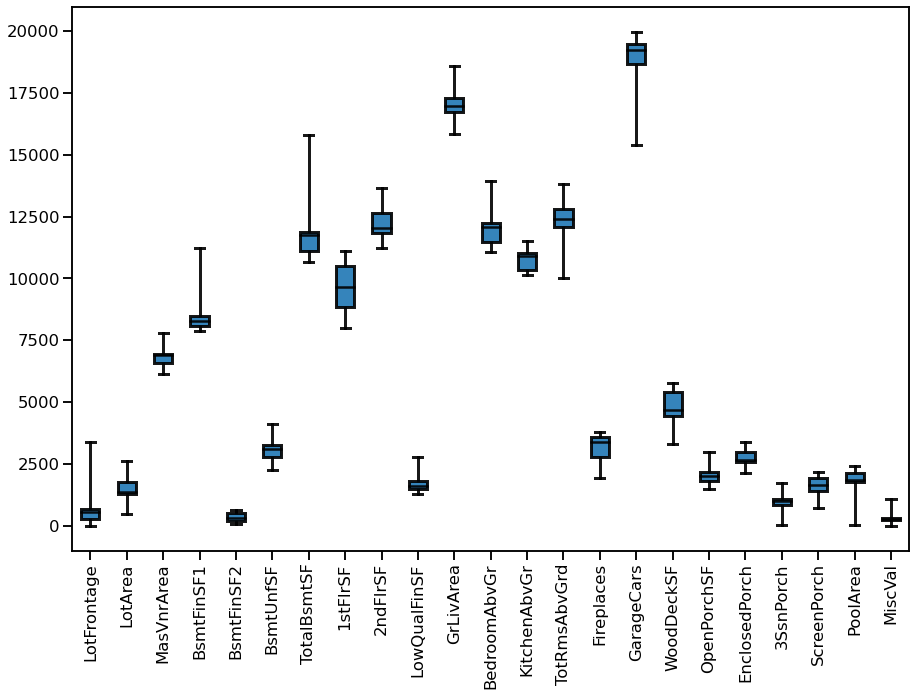

In [10]:
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

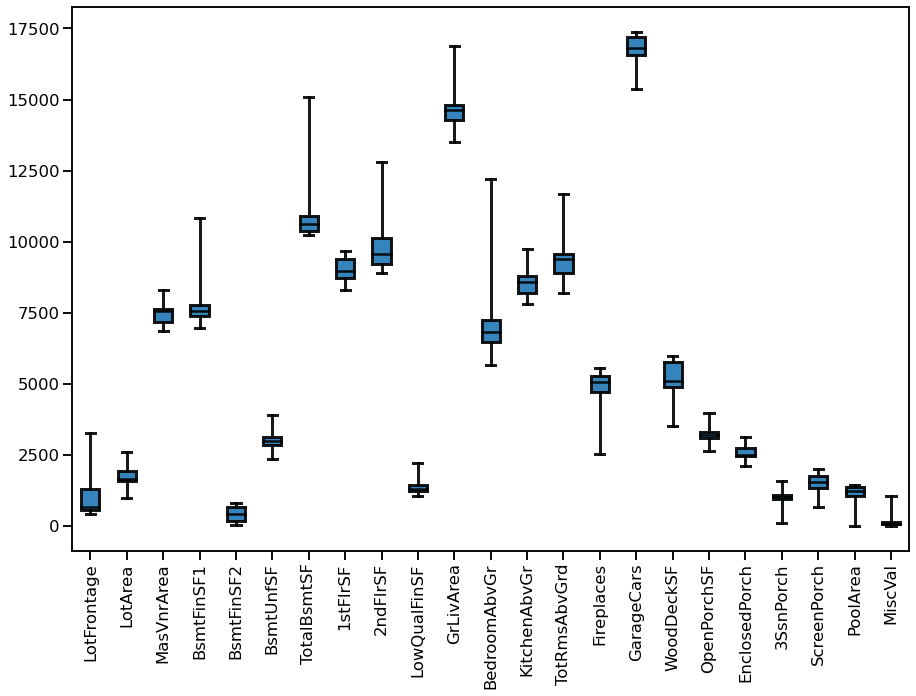

In [11]:
import numpy as np
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-1, 3, num=30)
model = make_pipeline(
    StandardScaler(), SimpleImputer(), RidgeCV(alphas=alphas)
)
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data_numerical.columns)
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


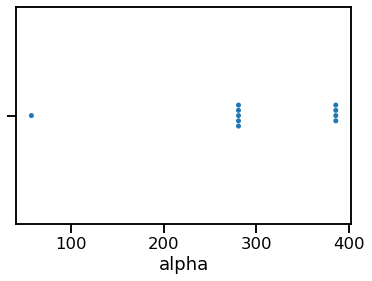

In [12]:
alpha = [estimator[-1].alpha_ for estimator in cv_results["estimator"]]
alpha = pd.Series(alpha, name="alpha")
ax = sns.swarmplot(alpha)

In [13]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

In [14]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OrdinalEncoder

data[selector(dtype_exclude=object)]

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


In [25]:
data.isnull().sum()

age               0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [27]:
list(data.columns)

['age', 'capital-gain', 'capital-loss', 'hours-per-week']

In [17]:
from sklearn.linear_model import LogisticRegression

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True
)

In [19]:
print(f"Test score of logistic regresion model on the test set:\n"
      f"{cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}")

Test score of logistic regresion model on the test set:
0.800 +/- 0.004


In [20]:
from sklearn.dummy import DummyClassifier
model = make_pipeline(StandardScaler(), DummyClassifier(strategy="most_frequent"))
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True
)

In [22]:
print(f"Test score of Dummy classifier on the test set:\n"
      f"{cv_results['test_score'].mean():.3f} +/- {cv_results['test_score'].std():.3f}")

Test score of Dummy classifier on the test set:
0.761 +/- 0.000


In [23]:
logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="none")
)
logistic_regression.fit(data, target)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(penalty='none'))])

In [28]:
coefs = logistic_regression[-1].coef_[0]  # the coefficients is a 2d array
weights = pd.Series(coefs, index=list(data.columns))

Text(0.5, 1.0, 'Weights of the logistic regression')

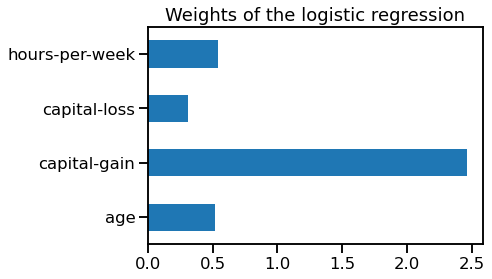

In [29]:
weights.plot.barh()
plt.title("Weights of the logistic regression")

<AxesSubplot:>

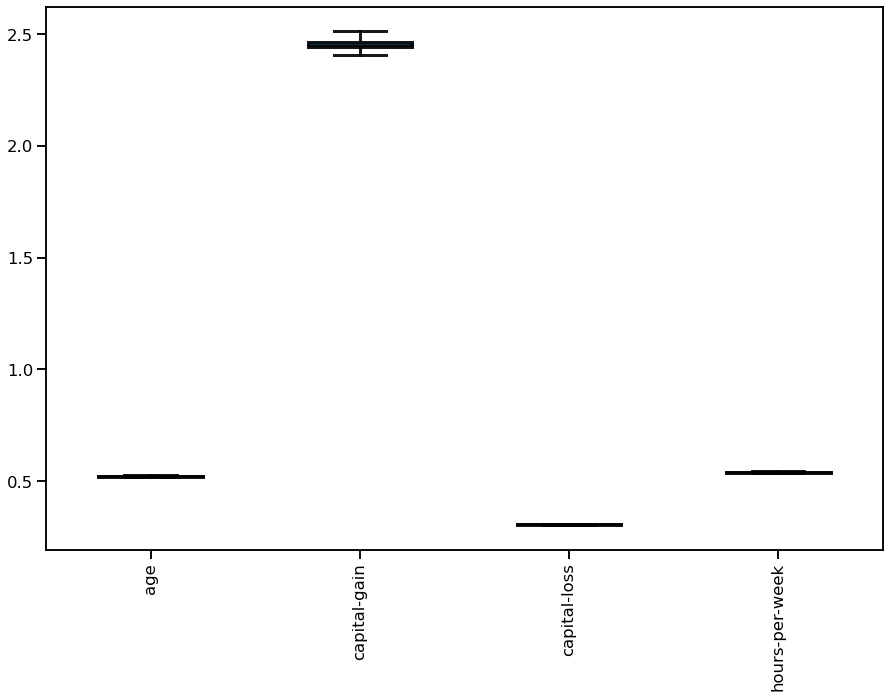

In [30]:
model = make_pipeline(StandardScaler(), LogisticRegression())
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True
)
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data.columns)
_, ax = plt.subplots(figsize=(15, 10))
coefs.abs().plot.box(**boxplot_property, ax=ax)

In [31]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [33]:
data.isnull().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [42]:
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), selector(dtype_include=object)),
    (StandardScaler(), selector(dtype_exclude=object))
)

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True
)

cv_results['test_score'].mean()

0.8515212206716812

In [43]:
from sklearn.compose import make_column_selector as selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = selector(dtype_include=object)(data)
numerical_columns = selector(dtype_exclude=object)(data)

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_columns),
    (StandardScaler(), numerical_columns),
)
model = make_pipeline(preprocessor, LogisticRegression(max_iter=5000))
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True, n_jobs=2
)
cv_results["test_score"].mean()

0.8515212248630878

In [44]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["onehotencoder"]
                             .get_feature_names(categorical_columns)).tolist()
feature_names += numerical_columns

<AxesSubplot:>

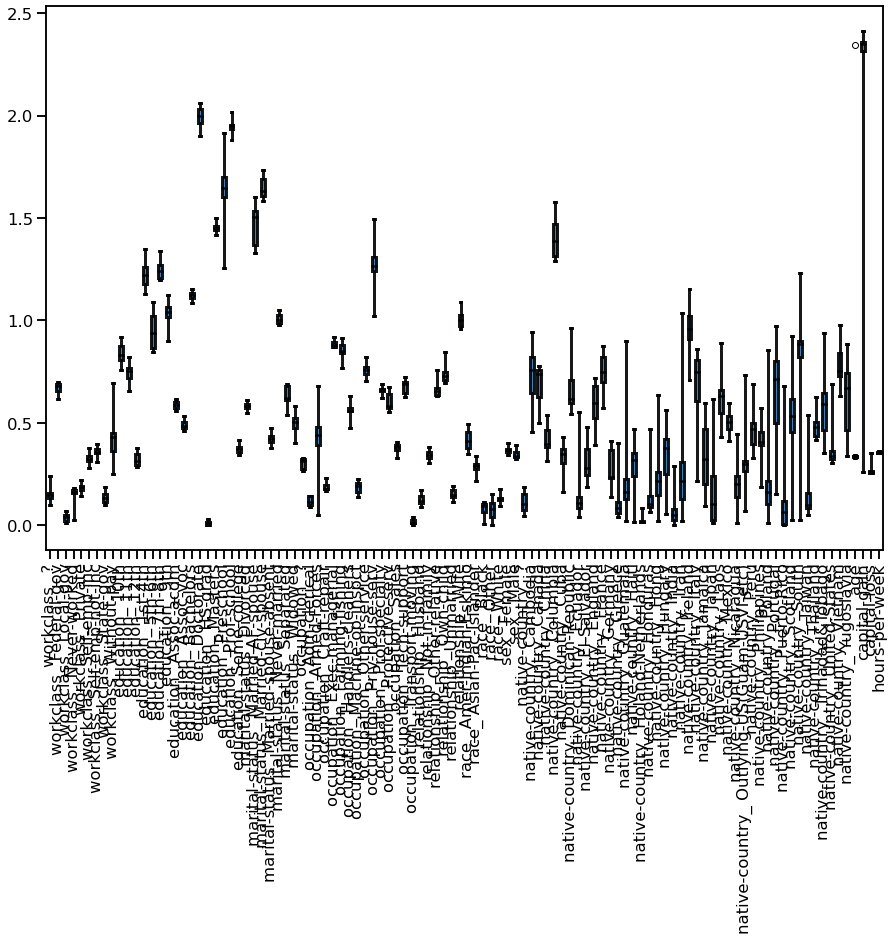

In [45]:
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)
_, ax = plt.subplots(figsize=(15, 10))
coefs.abs().plot.box(**boxplot_property, ax=ax)

In [49]:
coefs.abs().mean().sort_values()

education_ HS-grad                    0.012250
occupation_ Transport-moving          0.018455
native-country_ Holand-Netherlands    0.024590
workclass_ Local-gov                  0.038242
race_ Other                           0.077942
                                        ...   
education_ Preschool                  1.629935
marital-status_ Married-civ-spouse    1.646787
education_ Prof-school                1.942674
education_ Doctorate                  1.995064
capital-gain                          2.138839
Length: 106, dtype: float64

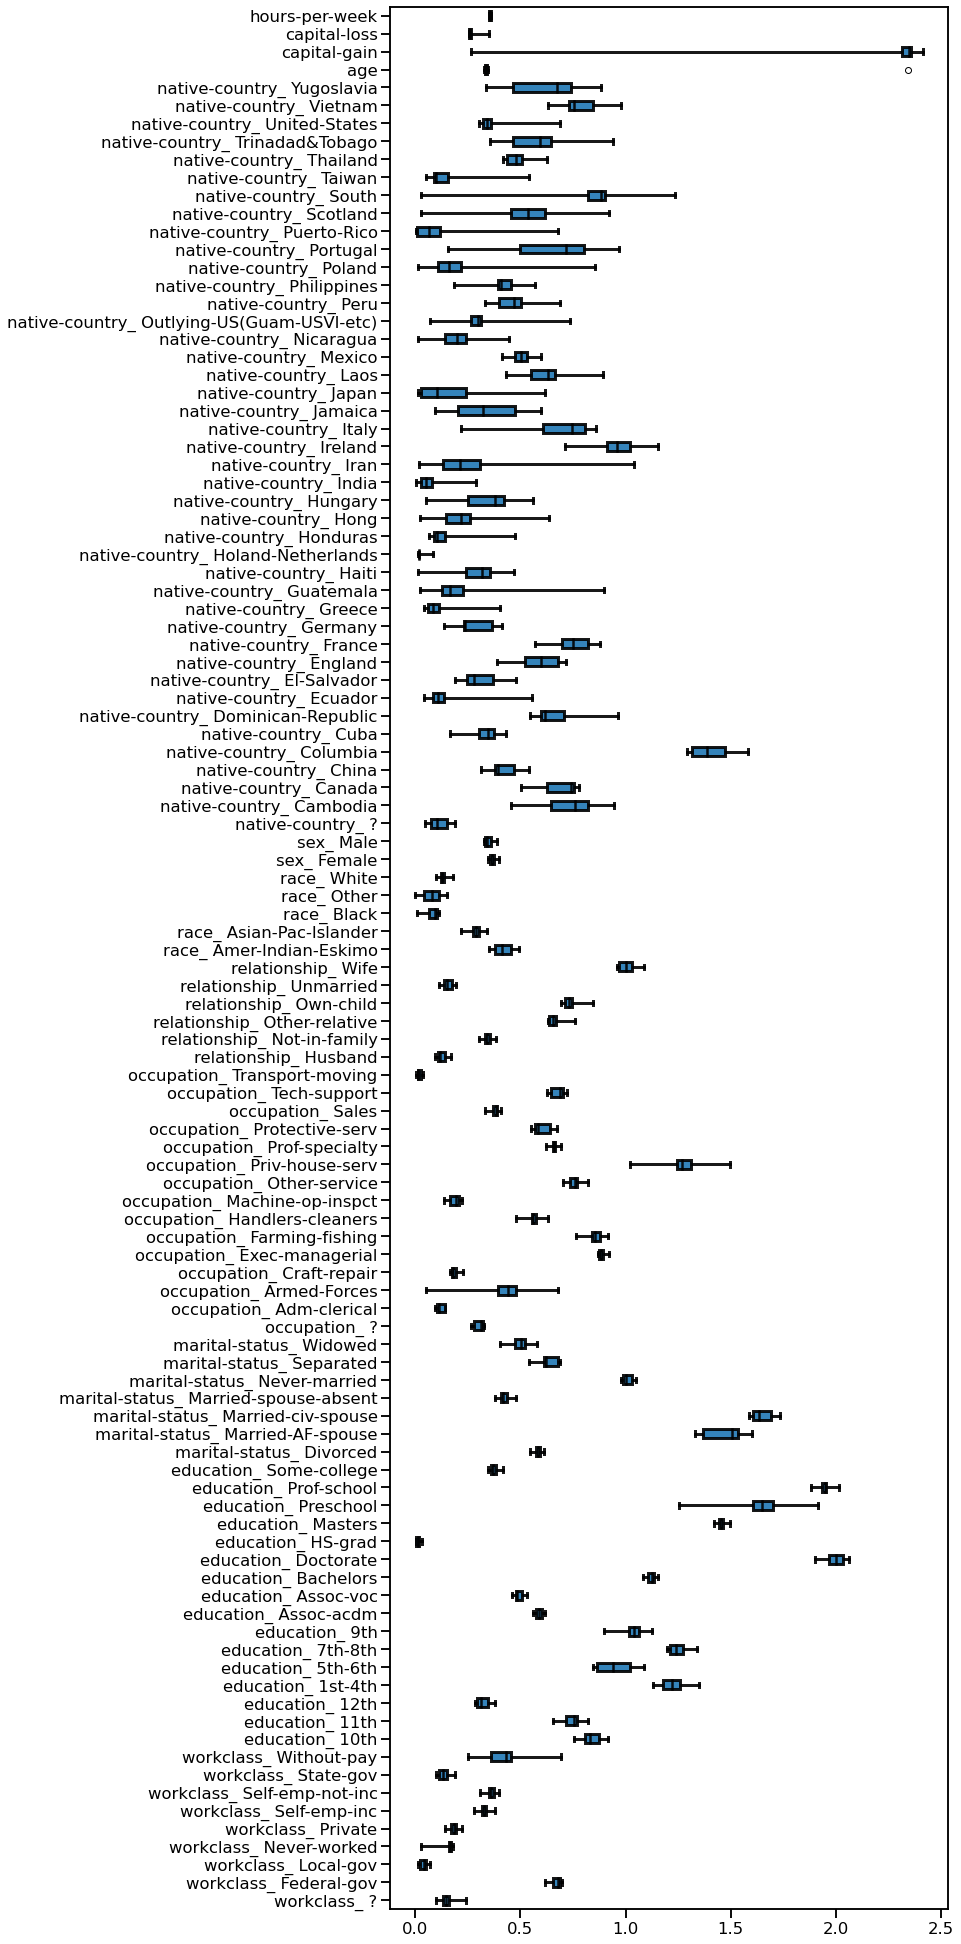

In [50]:
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)

# Define the style of the box style
boxplot_property = {
    "vert": False,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)


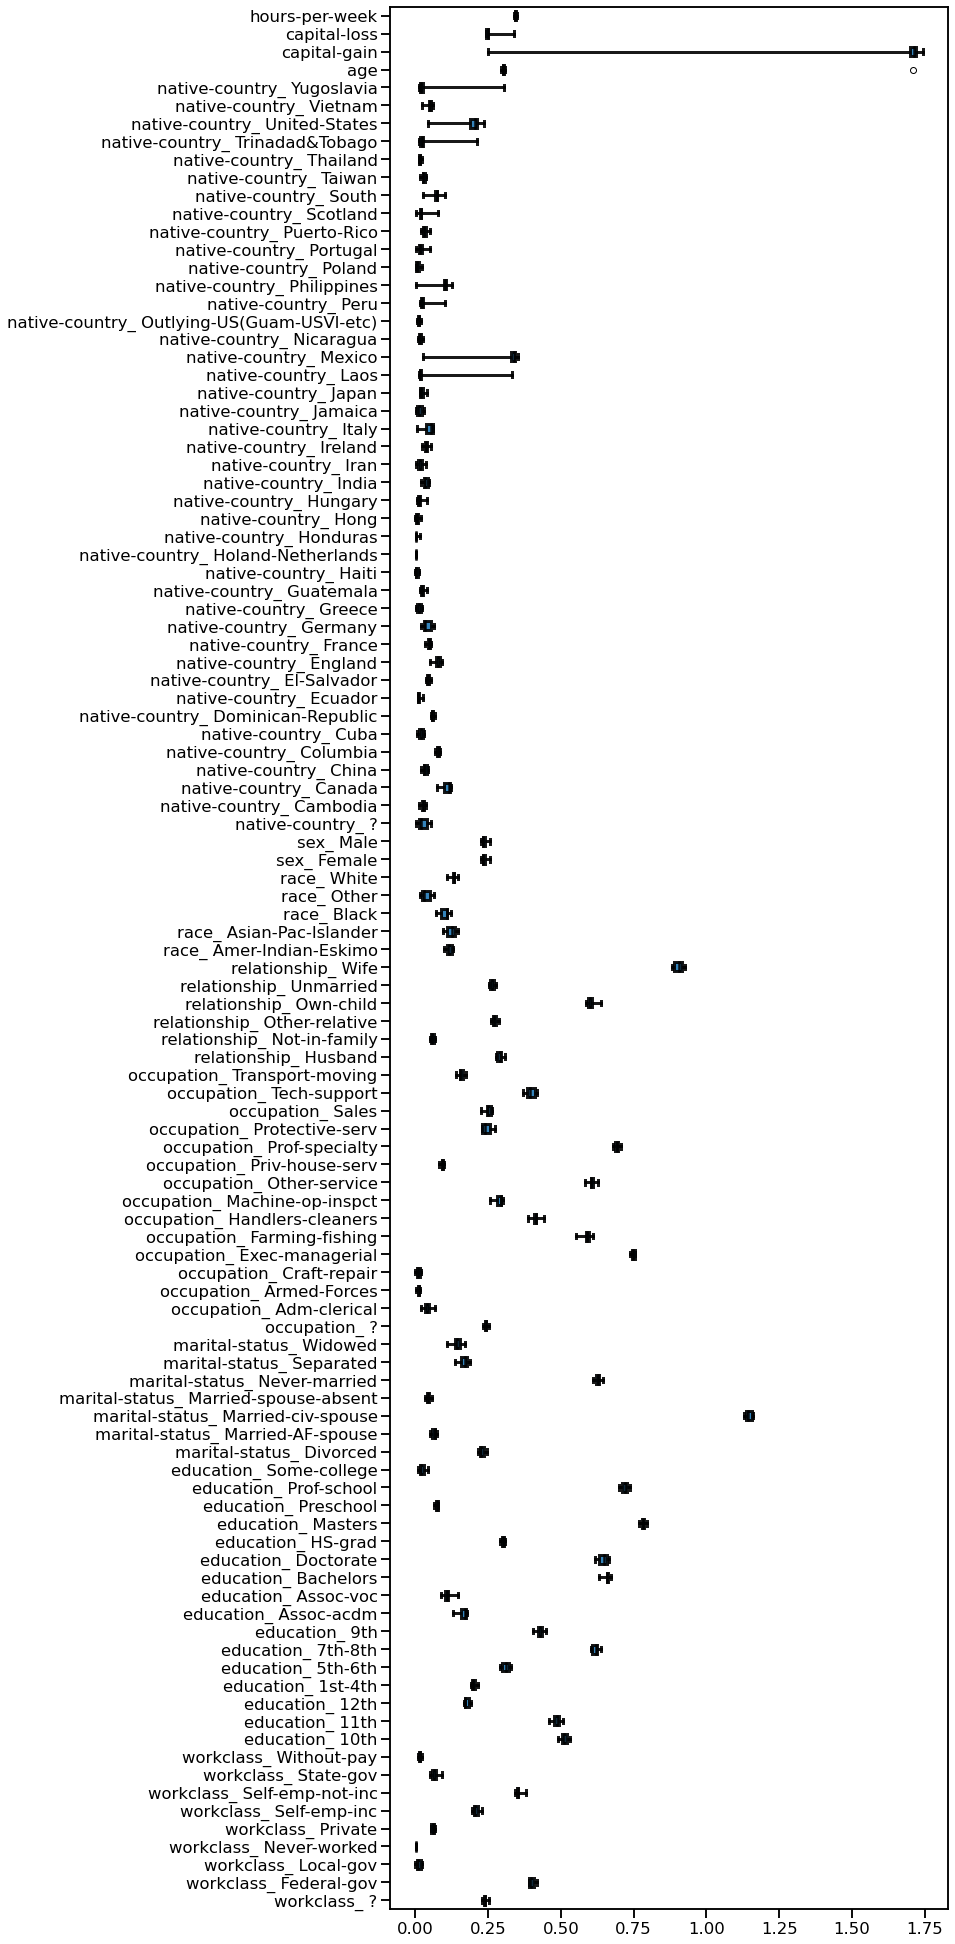

In [51]:
model = make_pipeline(
    preprocessor, LogisticRegression(C=0.01, max_iter=5000)
)
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True, n_jobs=2
)
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)
_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)